# 0. Motivation

Much like the sine and cosine functions, which often pose challenges in direct computation, analytically finding the roots of many functions in engineering and science is not possible. For simple functions such as $f(x) = ax^2 + bx + c$, you may already be familiar with the well-known quadratic formula

$$
x_r=\frac{-b\pm\sqrt{b^2-4ac}}{2a},
$$

which gives $x_r$, the two roots of $f$ exactly. However for more complicated functions, the roots can rarely be computed using such explicit, or exact, means. Several numerical methods exist to find approximate, and in some cases exact, roots to many functions commonly encountered in engineering and science.

By the end of this section, you should be able to:
* Describe the root finding problem
* Explain the challenges associated with finding roots using numerical methods
* Discuss two algorithms for root finding, the Bisection Method and the Newton-Raphson Method
* Implement these algorithms in Python, using both iterative and recursive approaches

# 1. Root Finding

A **root** of a function $f(x)$ is a value $x_r$ that satisfies $f(x_r) = 0$. A function may possess zero, one, or multiple roots. For instance, in the case of the function $f(x) = x^2 - 9$, it is evident that the roots are precisely $3$ and $-3$. However, when dealing with more complex functions like $f(x) = {\rm cos}(x) - x$, determining an analytical or exact solution for its roots can prove to be challenging. In such situations, the application of numerical methods becomes invaluable for root finding.

Numerical methods for root finding are typically iterative in nature, and can also be implemented recursively. These methods involve a series of steps, including:

1. Initiating an initial guess, denoted as $x_0$
2. Iterating to refine the answer $x_i$
3. Terminating when $x_i$ reaches an acceptable approximation

It is worth noting that these roots can extend to infinite decimal places. Consequently, when numerically computing them, it is crucial to establish a metric for quantifying the error and a criterion for what defines an acceptable approximation. 

## 1.1. Error

The **error** is the deviation from an expected or computed value. If $x_i$ is the estimated root at iteration $i$ and $x_r$ is the actual exact root, where $f(x_r) = 0$, we can define various measures of error:
* Absolute value of the function at $x_i$: $|f(x_i)|$
<br>

* Absolute error: $|x_r - x_i|$
<br>

* Relative error: $\dfrac{|x_r - x_i|}{|x_r|}$

<div class="alert alert-block alert-warning"> <b>NOTE!</b> These different measures of error have their advantages and disadvantages, and the choice of which metric to use must be done very carefully.</div>


If $x_i$ is an acceptable approximation of the root, then $|f(x_i)| \approx 0$. Similarly, if $x_i$ is an acceptable approximation of the root, then $x_i \approx x_r$, and consequently, $|x_r - x_i| \approx 0$ and $\dfrac{|x_r - x_i|}{|x_r|} \approx 0$.

While these error definitions are useful, it's essential to note that in the context of root finding, the actual root $x_r$ is generally unknown, as it is the value we are attempting to determine. Consequently, relying on $|x_r - x_i|$ as a measure of error is impractical. Root finding methods operate iteratively and gradually approach the root. As the estimate $x_i$ gets closer to the actual root, the change between subsequent iterations, denoted as $|x_{i+1} - x_i|$, diminishes. As such, the absolute and relative error can be estimated as:
* Absolute error: $|x_{i+1} - x_i|$
<br>

* Relative error: $\dfrac{|x_{i+1} - x_i|}{|x_{i+1}|}$

Another challenge with root finding methods is that reaching exactly zero error is often impractical and, in many cases, impossible. This is due to the finite precision of computer arithmetic. Computers use floating-point numbers with limited precision, resulting in small numerical fluctuations even when extremely close to the actual root. Therefore, exact zero error is rarely attainable in practical numerical computations.

## 1.2. Tolerance

Instead of targeting exactly zero error, numerical algorithms use tolerance thresholds to determine when to terminate the iterations. **Tolerance** is the level of error that is acceptable for an engineering application. A commonly used stopping criterion is to check if the error, using any of the above definitions, falls below a certain predefined tolerance value. This approach ensures that the result is sufficiently accurate for practical purposes while accounting for the inherent limitations of numerical computations. Another stopping criterion is when the number of iterations reaches a predetermined maximum number. As such, four common stopping criteria are:
1. $|f(x_i)| \leq tol$ 
<br>

2. $|x_{i+1} - x_i| \leq tol$
<br>
3. $\dfrac{|x_{i+1} - x_i|}{|x_{i+1}|} \leq tol$
<br>
4. $i = N$, where $N$ is a predetermined maximum number of iterations

## 1.3. Convergence

We say that a program has **converged** to a solution when it has found an answer $x_i$ with an error smaller than the tolerance. 

# 2. Bisection Method

One common numerical method for root finding is the bisection method. The steps of the bisection method are as follows:

1. Choose an initial interval $[a, b]$ where the function $f(x)$ changes sign: $f(a) \cdot f(b) < 0$
2. Compute the midpoint of the interval: $m = \dfrac{a + b}{2}$
3. Evaluate the function at the midpoint: $f(m)$

    3.1. If $|f(m)| < tol$ (or any other equivalent error is within the tolerance), you have found an acceptable root
    
    3.2. Else if $f(a) \cdot f(m) < 0$, set $b = m$.
    
    3.3. Else, set $a = m$.


4. Repeat until the stopping criterion is satisfied

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Write a recursive function <code>myBisection(f, a, b, tol)</code> which takes as input a function <code>f</code> and three scalar values <code>a, b, tol</code> and returns a root <code>m</code> of <code>f</code>, bounded by $a$ and $b$ to within $|f(m)| < {\text{tol}}$. If $f(a)\cdot f(b) <0$ is not satisfied, raise an exception with the message <code>'Invalid [a, b]'</code>.</div>

In [1]:
import numpy as np

# Define function
def myBisection(f, a, b, tol):
    # check if a and b are valid
    assert f(a) * f(b) < 0, 'Invalid [a, b]'
        
    # get midpoint
    m = (a + b)/2
    # check error
    if np.abs(f(m)) < tol:
        return m
    elif f(a) * f(m) < 0:
        return myBisection(f, a, m, tol)
    else:
        return myBisection(f, m, b, tol)

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Try your function <code>myBisection(f, a, b, tol)</code> for $f(x)=e^{-40x}+40xe^{-40x}-0.05$ with different values of <code>a, b, tol</code>.</div>

In [5]:
f = lambda x: np.exp(-40*x) + 40*x*np.exp(-40*x) - 0.05
root = myBisection(f, 0.1, 0.15, 1e-15)
print(f'r = {root}')
print(f'f(r) = {f(root)}')

r = 0.11859661295976451
f(r) = -8.326672684688674e-17


# 3. Newton-Raphson Method

Another common numerical method for root finding is the Newton-Raphson method. The steps of the Newton-Raphson method are as follows:

1. Choose an initial guess $x_0$
3. Evaluate the function at $x_{i}$: $f(x_i)$

    2.1. If $|f(x_i)| < tol$ (or any other equivalent error is within the tolerance), you have found an acceptable root
    
    2.2. Else, calculate an improved estimate $x_{i}$ using the formula: $x_{i} = x_{i-1} - \dfrac{f(x_{i-1})}{f'(x_{i-1})}$


3. Repeat until the stopping criterion is satisfied

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Write a recursive function <code>myNewton(f, df, x0, tol)</code> which takes as input two functions <code>f</code> and its derivative <code>df</code> and two scalar values <code>x0, tol</code> and returns a root <code>r</code> of <code>f</code> such that $|f(r)| < {\text{tol}}$.</div>

In [11]:
# Define function
def myNewton(f, df, x0, tol):
    # check error
    if np.abs(f(x0)) < tol:
        return x0
    else:
        xi = x0 - f(x0) / df(x0)
        return myNewton(f, df, xi, tol)

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Try your function <code>myNewton(f, df, x0, tol)</code> for $f(x)=e^{-40x}+40xe^{-40x}-0.05$ with different values of <code>x0, tol</code>.</div>

In [13]:
f = lambda x: np.exp(-40*x) + 40*x*np.exp(-40*x) - 0.05
df = lambda x: -40*np.exp(-40*x) + 40*np.exp(-40*x) - 40*40*x*np.exp(-40*x)
root = myNewton(f, df, 0.15, 1e-15)
print(f'r = {root}')
print(f'f(r) = {f(root)}')

r = 0.11859661295976444
f(r) = 2.0816681711721685e-17


<div class="alert alert-block alert-info"> <b>TRY IT!</b> Try your function <code>myNewton(f, df, x0, tol)</code> for $f(x)=e^{-40x}+40xe^{-40x}-0.05$ with <code>x0 = 0.18</code>. Then run the next code to visualize why the method fails to find the desired root.</div>

In [14]:
root = myNewton(f, df, 0.18, 1e-5)
print(f'r = {root}')
print(f'f(r) = {f(root)}')

r = -0.024531454108800945
f(r) = -3.3077872903242156e-07


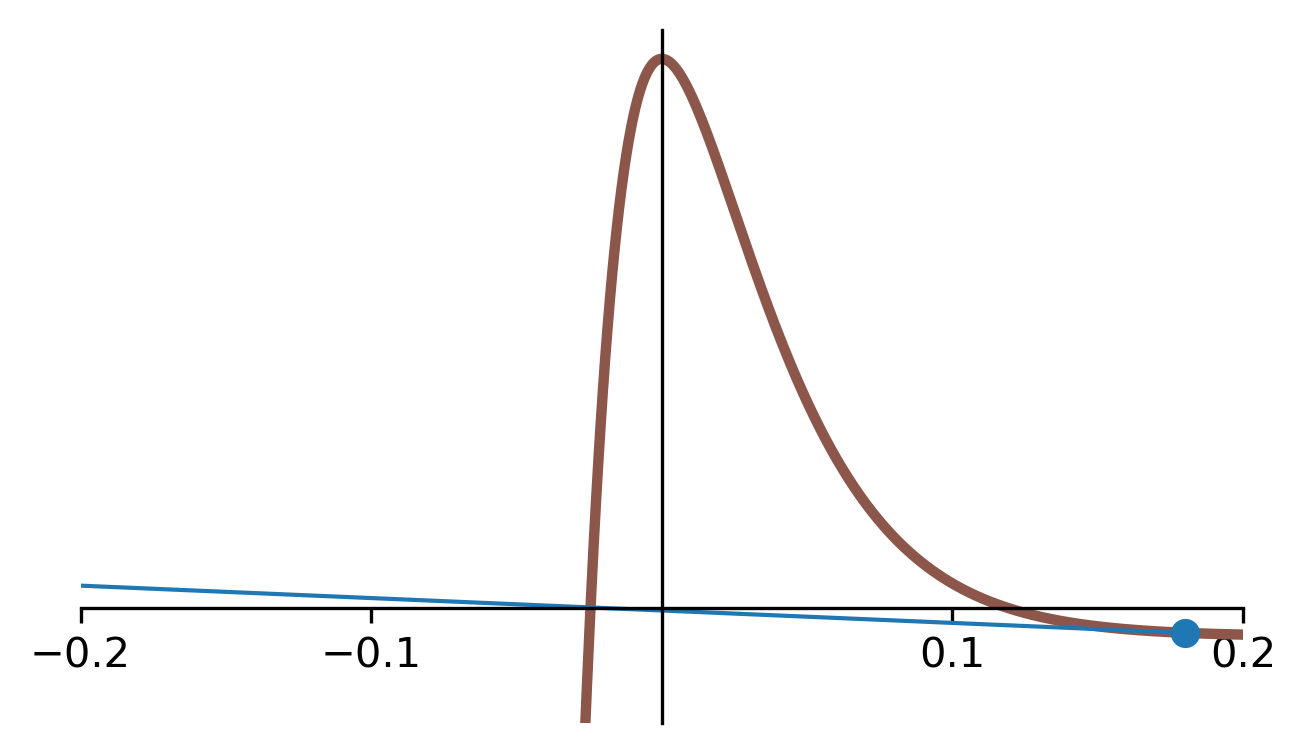

In [15]:
import matplotlib.pyplot as plt

# Create figure and axes
fig, ax = plt.subplots(figsize=(5,3), dpi=300)

# control axes
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.axis([-0.2, 0.2, -0.2, 1])

plt.rcParams['xtick.major.pad']='5'
plt.rcParams['ytick.major.pad']='5'

ax.set(yticks = [])
ax.set(xticks = [-0.2, -0.1, 0.1, 0.2])

# define array of x values for plotting
x = np.linspace(-0.2, 0.2,1000)

# define function that returns the value of the tangent to a function evaluated at point x0
tangent = lambda x0, x: df(x0)*x + f(x0) - df(x0)*x0

# plot the function
plt.plot(x, f(x), 'C5', lw=2.5)

# plot the tangent
plt.plot(np.linspace(-0.2, 0.18, 1000), tangent(0.18, np.linspace(-0.2, 0.18, 1000)), lw=1)
plt.plot(0.18, f(0.18), 'oC0')

plt.show()

# 4. Root Finding in Python

Several Python modules have existing root-finding functions. One such function is `fsolve()` from `scipy.optimize`. To use it, we will need to import SciPy: `import scipy` and then use `scipy.optimize.fsolve()`. The `scipy.optimize.fsolve()` function takes in many arguments that you can find in the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html). The most important two are the function you want to find its root, `f`, and the initial guess, `x0`: `scipy.optimize.fsolve(f, x0)`. 

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Use <code>fsolve(f, x0)</code> to find a root for $f(x)=e^{-40x}+40xe^{-40x}-0.05$ with different values of <code>x0</code>.</div>

In [17]:
import scipy
scipy.optimize.fsolve(f, 0.2)

/srv/conda/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([0.19999433])